In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train.astype('float32') / 255.0
x_test=x_test.astype('float32') / 255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model=Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [2]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=50,batch_size=128,validation_split=0.3)

Epoch 1/50
329/329 [==============================] - 6s 12ms/step - loss: 0.3440 - accuracy: 0.8946 - val_loss: 0.1335 - val_accuracy: 0.9606
Epoch 2/50
329/329 [==============================] - 3s 10ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.1197 - val_accuracy: 0.9638
Epoch 3/50
329/329 [==============================] - 4s 11ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.1049 - val_accuracy: 0.9684
Epoch 4/50
329/329 [==============================] - 3s 11ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.1030 - val_accuracy: 0.9703
Epoch 5/50
329/329 [==============================] - 3s 10ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0946 - val_accuracy: 0.9742
Epoch 6/50
329/329 [==============================] - 3s 9ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.1121 - val_accuracy: 0.9708
Epoch 7/50
329/329 [==============================] - 3s 10ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.1179 - val_accuracy: 0.9724


In [3]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.1395


In [15]:
y_pred=model.predict(x_test)
y_pred_classes=tf.argmax(y_pred,axis=1)
y_true=tf.argmax(y_test,axis=1)

report=classification_report(y_true,y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.96      0.99      0.97       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



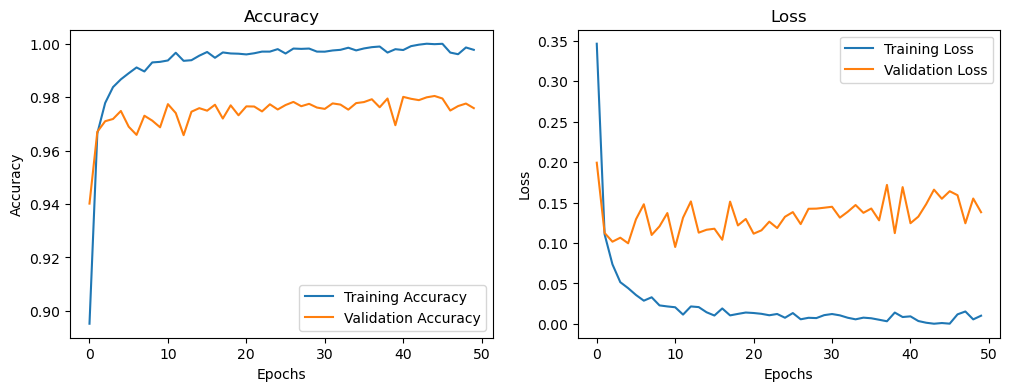

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf


def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path).convert('L')
            img_resized = img.resize((28, 28))
            img_array = np.array(img_resized).reshape(1, 28, 28, 1)
            
            # Debugging statements
            print(f"Image shape after reshape: {img_array.shape}")
            print(f"Image array after reshape and normalize: {img_array}")
            
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction)
            result_label.config(text=f'Predicted Class: {predicted_class}')
            
            img_display = ImageTk.PhotoImage(img)
            image_label.config(image=img_display)
            image_label.image = img_display
        except Exception as e:
            print(f"Error processing image: {e}")
            result_label.config(text=f"Error: {e}")

root = tk.Tk()
root.title('MNIST Digit Classifier')

open_button = tk.Button(root, text="Open Image", command=open_image)
open_button.pack()

image_label = tk.Label(root)
image_label.pack()

result_label = tk.Label(root, text='Predicted Class: ')
result_label.pack()

root.mainloop()
